In [1]:
from matplotlib import pyplot as plt

from funciones import *

import numpy as np
from numpy import pi

from numpy import exp, sqrt
from scipy.special import gammaincc, gamma, erf, exp1
from scipy import integrate

import tqdm

In [2]:
n_lines = 10**4
N = 10**4

y = generar_lineas(n_lines = n_lines, N = N, y0 = 0, yN = 0)
delta = (y.max(axis = 1) - y.min(axis = 1))
masas = np.linspace(0.01,5,1000)

In [3]:
def fuerza_casimir_numerica(a,m,delta) -> np.array (delta.shape): 
    
    primer_termino  = m**2  *exp1(a**2 * m**2 / delta**2) / (8 * pi) if m!= 0 else 0
    segundo_termino = - delta**2 * np.exp(-a**2 * m**2 / delta**2) / (8 * a**2 * pi)
    
    return primer_termino + segundo_termino

def fuerza_casimir_analitica(a,m) -> float:
    return -integrate.quad(lambda t: t**2 / (np.sqrt(t**2-m**2)*(np.exp(2*a*t)-1)),m,np.inf)[0] / np.pi

In [4]:
fuerzas_analiticas = []
for masa in masas:
    fuerzas_analiticas.append(fuerza_casimir_analitica(1,masa))
    
fuerzas_analiticas = np.array(fuerzas_analiticas) #shape = masas.shape 

<ipython-input-3-37fa890798fc>:9: RuntimeWarning: overflow encountered in exp
  return -integrate.quad(lambda t: t**2 / (np.sqrt(t**2-m**2)*(np.exp(2*a*t)-1)),m,np.inf)[0] / np.pi


In [5]:
fuerzas_numericas = []
desviaciones_estandar = []
fuerzas_casimir = []

for masa in masas:
    fuerza_casimir = fuerza_casimir_numerica(1,masa,delta) #delta.shape
    
    fuerzas_casimir.append(fuerza_casimir) #shape = (masa.shape, delta.shape)
    desviaciones_estandar.append(fuerza_casimir.std()) #shape = masa.shape
    fuerzas_numericas.append(fuerza_casimir.mean()) #shape =  masa.shape
    
fuerzas_numericas = np.array(fuerzas_numericas)
desviaciones_estandar = np.array(desviaciones_estandar)
fuerzas_casimir = np.array(fuerzas_casimir)

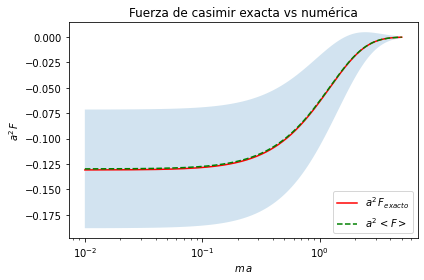

In [32]:
# plt.figure(figsize = (10,10))

plt.plot(masas, fuerzas_analiticas, label = '$ a^2 \, F _{exacto} $', c = 'r')
plt.plot(masas, fuerzas_numericas, label = '$a^2 \, < F >$', c = 'g',linestyle='--' )
plt.fill_between(masas, (fuerzas_numericas - desviaciones_estandar ), 
                         fuerzas_numericas + desviaciones_estandar , 
                 alpha = 0.2) #, label = '$\\Delta$ F')

plt.legend( loc="lower right") #bbox_to_anchor=(1.3,0.7),

plt.title('Fuerza de casimir exacta vs numérica')
plt.ylabel('$ a^2 \, F$')
plt.xlabel('$m \, a$')

plt.xscale('log')

plt.tight_layout()
plt.savefig('fuerza_casimir_masa_linea.pdf')

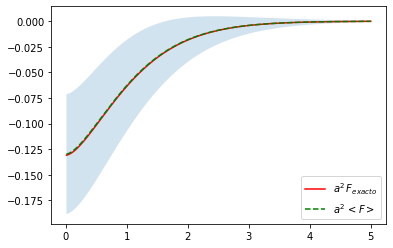

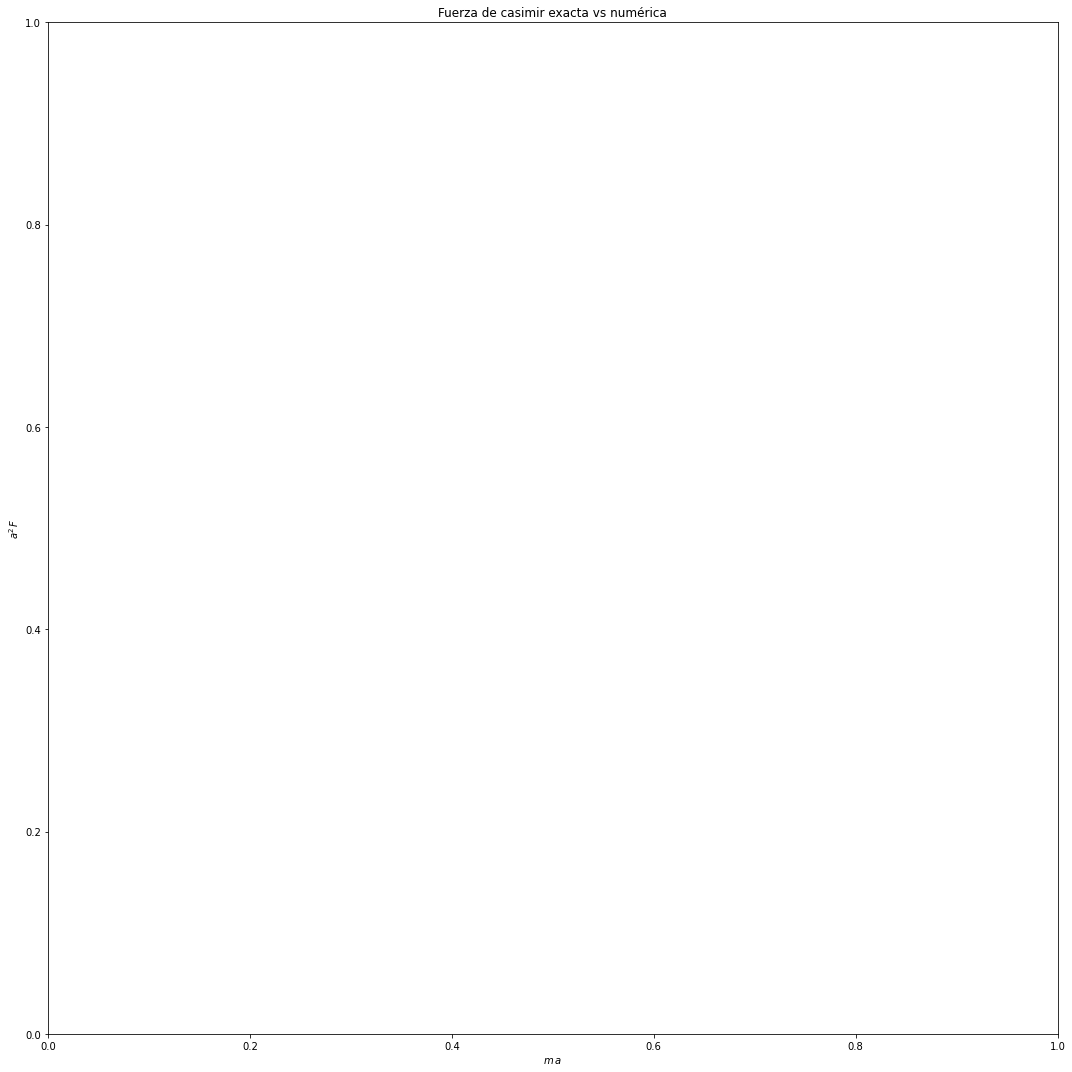

In [29]:
plt.plot(masas, fuerzas_analiticas, label = '$ a^2 \, F _{exacto} $', c = 'r')
plt.plot(masas, fuerzas_numericas, label = '$a^2 \, < F >$', c = 'g',linestyle='--' )
plt.fill_between(masas, (fuerzas_numericas - desviaciones_estandar ), 
                         fuerzas_numericas + desviaciones_estandar , 
                 alpha = 0.2) #, label = '$\\Delta$ F')

plt.legend( loc="lower right") #bbox_to_anchor=(1,1),


plt.title('Fuerza de casimir exacta vs numérica')
plt.ylabel('$ a^2 \, F$')
plt.xlabel('$m \, a$')

# plt.xscale('log')

plt.tight_layout()
plt.savefig('fuerza_casimir_masa_linea.pdf')

# Sirve para algo tener la distribución de la fuerza de casimir?

In [ ]:
n_lines = 5*(10**4)
N = 10**4

y = generar_lineas(n_lines = n_lines, N = N, y0 = 0, yN = 0)
delta = (y.max(axis = 1) - y.min(axis = 1))
masas = np.linspace(0.01,5,1000)


fuerzas = fuerza_casimir_numerica(a = 1,m = 0,delta = delta)

In [ ]:
plt.hist(fuerzas, bins = 100, density = True)
plt.plot([fuerzas.mean(),fuerzas.mean()],[0,8])
plt.errorbar(fuerzas.mean(), 4, xerr = fuerzas.std())
plt.show()